In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
from get_total_movie_info import *

In [2]:
df = get_total_movie_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [3]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,year,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,primary_name
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,42.0,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",2014,NaN,NaN,NaN,rennyharlin
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,38.0,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",2013,NaN,NaN,NaN,davidetalbert
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,15.0,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",2011,NaN,NaN,NaN,bennettmiller
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,clinteastwood
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",2010,NaN,NaN,NaN,esycasey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,NaN,NaN,NaN,NaN,NaN,2013,A24,5800000.0,13300000,sofiacoppola
2578,tt2205697,7.2,78903,Stuck in Love.,Stuck in Love.,2012,97.0,"Comedy,Drama,Romance",6,stuckinlove,...,NaN,NaN,NaN,NaN,NaN,2013,MNE,81100.0,NaN,joshboone
2579,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,NaN,2014,FCW,59200.0,NaN,stevenbrill
2580,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",16,boyerased,...,NaN,NaN,NaN,NaN,NaN,2018,Focus,6800000.0,5000000,joeledgerton


### Gross Box Office

In [4]:
movie_gross = pd.read_csv("../Data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
clean_df = movie_gross['title'].map(lambda x: x.lower())
clean_df.head()

0                                    toy story 3
1                     alice in wonderland (2010)
2    harry potter and the deathly hallows part 1
3                                      inception
4                            shrek forever after
Name: title, dtype: object

In [6]:
clean_df = movie_gross['title'].apply(lambda x: x.strip())
clean_df.head()

0                                    Toy Story 3
1                     Alice in Wonderland (2010)
2    Harry Potter and the Deathly Hallows Part 1
3                                      Inception
4                            Shrek Forever After
Name: title, dtype: object

### The Movies db

In [7]:
df = pd.read_csv('../Data/tmdb.movies.csv', index_col=0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Comparing original_title and title

In [8]:
df.shape

(26517, 9)

In [9]:
df[['original_title', 'title']].head(10)

,original_title,title
0,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1
1,How to Train Your Dragon,How to Train Your Dragon
2,Iron Man 2,Iron Man 2
3,Toy Story,Toy Story
4,Inception,Inception
5,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...
6,Avatar,Avatar
7,Toy Story 3,Toy Story 3
8,Despicable Me,Despicable Me
9,Megamind,Megamind


In [10]:
df['original_title'].value_counts()

Eden                         7
Home                         6
Aftermath                    5
Legend                       5
Truth or Dare                5
                            ..
Slaughter Creek              1
Jay Pharoah: Can I Be Me?    1
Liars Fires and Bears        1
Needlestick                  1
ドラゴンボールZ 神と神                 1
Name: original_title, Length: 24835, dtype: int64

In [11]:
df['title'].value_counts()

Home                          7
Eden                          7
Alone                         5
The Gift                      5
The Box                       5
                             ..
Somebody's Hero               1
Sui Dhaaga - Made in India    1
Meet Me There                 1
No Lives Matter               1
The Price of Everything       1
Name: title, Length: 24688, dtype: int64

In [12]:
df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [13]:
df[df.duplicated(keep=False)].sort_values(by='original_title')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
6315,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
20070,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
...,...,...,...,...,...,...,...,...,...
21659,"[18, 10749]",88752,zh,當愛來的時候,2.621,2011-03-11,When Love Comes,7.3,10
13823,"[35, 18]",281139,zh,行動代號：孫中山,0.600,2014-11-01,Meeting Dr. Sun,5.4,4
17054,"[35, 18]",281139,zh,行動代號：孫中山,0.600,2014-11-01,Meeting Dr. Sun,5.4,4
17659,"[36, 18, 10752, 28]",407887,ko,인천상륙작전,8.810,2016-08-12,Operation Chromite,6.0,86


### The Numbers db

In [14]:
df1 = pd.read_csv('../Data/tn.movie_budgets.csv', index_col=0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
df1['movie'].value_counts()

Halloween                            3
King Kong                            3
Home                                 3
Pet Sematary                         2
Death at a Funeral                   2
                                    ..
The Mothman Prophecies               1
I Am Sam                             1
Superman Returns                     1
Battle for the Planet of the Apes    1
Sing                                 1
Name: movie, Length: 5698, dtype: int64

### Joining by movie title ###

In [16]:
### FIX ME : Doesn't join on title and movie
budget_and_rating_df = df1.join(df, rsuffix= '_budget', how = 'inner')
budget_and_rating_df.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id,original_language,original_title,popularity,release_date_budget,title,vote_average,vote_count
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Jun 8, 2007",Ocean's Thirteen,"$85,000,000","$117,144,465","$311,744,465","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 26, 2003",Timeline,"$80,000,000","$19,480,739","$26,703,184","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Aug 21, 2009",Inglourious Basterds,"$70,000,000","$120,774,594","$316,915,264","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 21, 2012",Red Dawn,"$65,000,000","$44,806,783","$48,164,150","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,"Nov 26, 1997",Alien: Resurrection,"$60,000,000","$47,795,018","$160,700,000","[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [17]:
budget_and_rating_df.value_counts()

release_date  movie                    production_budget  domestic_gross  worldwide_gross  genre_ids              id     original_language  original_title             popularity  release_date_budget  title                      vote_average  vote_count
Sep 9, 2016   When the Bough Breaks    $10,000,000        $29,747,603     $30,768,449      [10749, 35]            25195  en                 Leap Year                  11.821      2010-01-08           Leap Year                  6.7           990           1
Feb 23, 1996  Rumble in the Bronx      $7,500,000         $32,281,907     $36,238,752      [35, 16, 10751]        9994   en                 The Great Mouse Detective  13.348      1986-07-02           The Great Mouse Detective  7.1           769           1
Feb 23, 2000  Wonder Boys              $35,000,000        $19,389,454     $33,422,485      [16, 10751]            38757  en                 Tangled                    21.511      2010-11-24           Tangled                    7.5    

### IMDB db

In [18]:
import sqlite3
conn = sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table';
"""
pd.read_sql(sql_query,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [19]:
# Basic movie info
q = """
SELECT * FROM movie_basics
"""
movie_basics_pd = pd.read_sql(q, conn)
movie_basics_pd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
# Ratings
q = """
SELECT * FROM movie_ratings
"""
movie_ratings_pd = pd.read_sql(q, conn)
movie_ratings_pd.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Joining movie information

In [21]:
# Join movie_basics and movie_ratings tables from IMDB db
# Inner Join on movie_id
# Provides comparison of title, year, genres, and averagerating
# Instantiates the dataframe 'movie_info_pd'
q = """
SELECT * FROM movie_basics JOIN movie_ratings
USING(movie_id)

"""
movie_info_pd = pd.read_sql(q, conn)

In [22]:
movie_info_pd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [23]:
type(movie_basics_pd)

pandas.core.frame.DataFrame

In [24]:
# Instantiates table movie_aka from IMDB db as dataframe movie_region_pd
q = """
SELECT * FROM movie_akas

"""
movie_region_pd = pd.read_sql(q, conn)
movie_region_pd.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [25]:
# Imports to query dataframes
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [26]:
# Testing query import
q = """SELECT
        primary_title
    FROM 
        movie_info_pd info;

"""

In [27]:
results = pysqldf(q)
results.head()

,primary_title
0,Sunghursh
1,One Day Before the Rainy Season
2,The Other Side of the Wind
3,Sabse Bada Sukh
4,The Wandering Soap Opera


In [28]:
# Concatinate dataframes movie_info_pd and movie_region_pd 
# Allows filtering by region
df = movie_info_pd.join(movie_region_pd, rsuffix= '_region_')

In [29]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [30]:
# Filter dataframe by region "US"
# As dataframe us_results
q = """SELECT
        *
    FROM 
        df
    WHERE region == "US";

"""

In [31]:
us_results = pysqldf(q)
us_results.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
1,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22,tt0369610,29,Jurassic World,US,None,None,None,0.0
2,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
4,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,6.2,10,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
5,tt0365545,Nappily Ever After,Nappily Ever After,2018,98.0,"Comedy,Drama,Romance",6.4,6287,tt0401729,11,John Carter of Mars,US,None,working,None,0.0
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,tt0401729,12,A Princess of Mars,US,None,working,None,0.0
7,tt0409847,Cowboys & Aliens,Cowboys & Aliens,2011,119.0,"Action,Sci-Fi,Thriller",6.0,195889,tt0401729,2,John Carter,US,None,None,None,0.0
8,tt0425785,El borde del tiempo,El borde del tiempo,2011,100.0,Drama,6.2,6,tt0401729,5,Barsoom,US,None,None,fake working title,0.0
9,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation",6.6,133355,tt1014759,23,Alice in Wonderland: An IMAX 3D Experience,US,None,None,IMAX version,0.0


In [32]:
# Checking year to find cut off for recent, relevant entries
us_results['start_year'].value_counts()

2015    1300
2016    1285
2014    1276
2017    1248
2013    1162
2012    1149
2018    1100
2011    1084
2010    1057
2019     326
Name: start_year, dtype: int64

In [33]:
# Limiting us_results to movies started in the last 5 years
# As dataframe modern_movies
modern_movies = us_results[us_results['start_year'] >= 2015]
modern_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
2,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
5,tt0365545,Nappily Ever After,Nappily Ever After,2018,98.0,"Comedy,Drama,Romance",6.4,6287,tt0401729,11,John Carter of Mars,US,None,working,None,0.0
12,tt0470936,"Hot Country, Cold Winter","Tak erkir, tsurt dzmer",2016,104.0,Drama,4.0,62,tt10379338,1,Guys Night Out,US,None,imdbDisplay,None,0.0
17,tt0491175,Suburbicon,Suburbicon,2017,105.0,"Comedy,Crime,Drama",5.6,31294,tt1189904,1,Small Town Hero,US,None,None,None,0.0


In [34]:
# Ordering by year
q = """SELECT
        *
    FROM 
        modern_movies
    ORDER BY start_year;

"""

In [35]:
modern_movies = pysqldf(q)
modern_movies.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id_region_,ordering,title,region,language,types,attributes,is_original_title
0,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
1,tt0850678,Jackson Arms,Jackson Arms,2015,90.0,Romance,6.1,15,tt1248300,1,Rollers,US,None,None,None,0.0
2,tt1018728,Heart Like a Hand Grenade,Heart Like a Hand Grenade,2015,96.0,Documentary,7.4,335,tt1422800,11,Wake,US,None,festival,None,0.0
3,tt1196939,Gracie,Gracie,2015,71.0,"Crime,Drama,Fantasy",7.0,31,tt1822325,1,The Black Belle,US,None,None,None,0.0
4,tt1226766,The Great Gilly Hopkins,The Great Gilly Hopkins,2015,99.0,"Comedy,Drama,Family",6.5,3884,tt1854545,1,Jerseyboy Hero,US,None,None,None,0.0
5,tt1254322,The Girl King,The Girl King,2015,106.0,"Biography,Drama,History",5.9,3116,tt1913193,1,Utopians,US,None,None,None,0.0
6,tt1321390,Greyscale,Greyscale,2015,105.0,"Action,Crime,Drama",8.0,45,tt2057486,1,The Lazy Ones,US,None,None,None,0.0
7,tt1365050,Beasts of No Nation,Beasts of No Nation,2015,137.0,"Drama,War",7.8,63797,tt2124845,1,Luna Mesa,US,None,None,None,0.0
8,tt1369667,Me and Kaminski,Ich und Kaminski,2015,124.0,"Comedy,Drama",6.7,1125,tt2129871,1,Absolute Corruption,US,None,None,None,0.0
9,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography",6.9,108628,tt2197094,1,Vertical,US,None,None,None,0.0


In [36]:
# Checking values of filtered and ordered data.
modern_movies['start_year'].value_counts()

2015    1300
2016    1285
2017    1248
2018    1100
2019     326
Name: start_year, dtype: int64

In [37]:
# Initial statistics of modern_movies
modern_movies.describe()


,start_year,runtime_minutes,averagerating,numvotes,ordering,is_original_title
count,5259.000000,4680.000000,5259.000000,5259.000000,5259.000000,5259.0
mean,2016.594410,95.417094,6.383856,2591.081384,3.176459,0.0
std,1.235327,29.470891,1.490126,24131.393862,5.531820,0.0
min,2015.000000,4.000000,1.000000,5.000000,1.000000,0.0
25%,2016.000000,82.000000,5.500000,14.000000,1.000000,0.0
50%,2017.000000,92.000000,6.500000,49.000000,1.000000,0.0
75%,2018.000000,105.000000,7.400000,258.000000,3.000000,0.0
max,2019.000000,1100.000000,9.800000,820847.000000,52.000000,0.0


C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


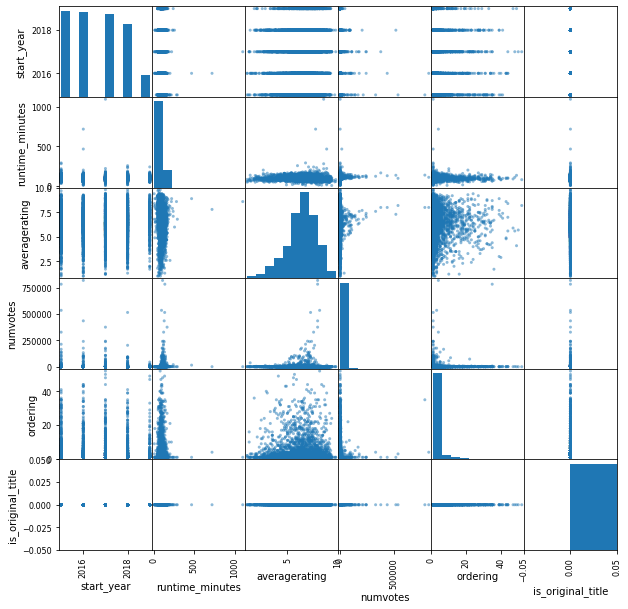

In [38]:
pd.plotting.scatter_matrix(modern_movies);

# Fix format
Adam Burstyn
Group

This notebook contains the code to explore the tables provided for the movie information

In [39]:
import pandas as pd
import sqlite3
import re

## Explore links to combine tables

### Load tables from data scources

In [40]:
# load tables from the sql db

# connect  to db
conn = sqlite3.connect("../Data/im.db")

# load movie basics table
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)

# load movie ratings table
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;", conn)

# load movie aka table
movie_akas_df = pd.read_sql("SELECT * FROM movie_akas;", conn)

### Load data from files

In [41]:
# load movie gross data
movie_gross = pd.read_csv("../Data/bom.movie_gross.csv")

# load movie budget/gross data
movie_budgets = pd.read_csv("../Data/tn.movie_budgets.csv")

### Preview tables

In [42]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [43]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [44]:
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [45]:
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


* only about half of the movies have ratings, is it worth exploring an algorithm to impute the missing ratings?

In [46]:
movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


### Combine SQL tables

In [47]:
# join tables on movie_id
df = movie_ratings_df.merge(movie_basics_df, how="inner", on="movie_id")
df = df.merge(movie_akas_df, how="inner", on="movie_id")
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,1,Just Inès,None,None,original,None,1.0
1,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,2,Samo Ines,RS,None,imdbDisplay,None,0.0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,3,Just Inès,GB,None,None,None,0.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",10,The Legend of Hercules,None,None,original,None,1.0
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",11,Hércules - A Lenda Começa,PT,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9691896,6.3,21,Out,Coming Out,2018,64.0,Documentary,4,Coming Out,None,None,original,None,1.0
261802,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",1,Code Geass: Lelouch of the Rebellion Episode III,JP,None,None,None,0.0
261803,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",2,Code Geass: Lelouch of the Rebellion Episode III,None,None,original,None,1.0
261804,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,None,0.0


### Keep only US movies

In [48]:
# find the tag for US region
df["region"].unique()

array([None, 'RS', 'GB', 'PT', 'JP', 'AL', 'HR', 'VN', 'IT', 'GR', 'UA',
       'RO', 'US', 'CA', 'CL', 'MX', 'RU', 'TR', 'IL', 'AR', 'PE', 'FR',
       'ES', 'BR', 'PL', 'BG', 'HU', 'VE', 'SE', 'XWW', 'XEU', 'SI', 'UY',
       'FI', 'DE', 'PH', 'NO', 'DK', 'EE', 'BE', 'LT', 'CO', 'CZ', 'AT',
       'GE', 'IE', 'ZA', 'BA', 'LV', 'AU', 'LU', 'IN', 'KR', 'IR', 'NL',
       'DZ', 'CN', 'NZ', 'ID', 'MY', 'JO', 'RW', 'EG', 'CH', 'LI', 'TH',
       'BF', 'CSXX', 'SG', 'NP', 'SK', 'BD', 'PA', 'KE', 'PK', 'PS', 'HK',
       'MK', 'KZ', 'TW', 'LK', 'IS', 'MW', 'DO', 'BO', 'PY', 'SL', 'AZ',
       'AF', 'AE', 'PR', 'CU', 'NG', 'IQ', 'AM', 'CY', 'GU', 'HN', 'XAS',
       'TN', 'BY', 'SA', 'HT', 'MT', 'BH', 'KH', 'KG', 'FO', 'SV', 'XSA',
       'GT', 'LB', 'BT', 'CR', 'XKV', 'UZ', 'MA', 'ME', 'LA', 'SB', 'XKO',
       'SY', 'TZ', 'QA', 'MN', 'EC', 'JM', 'NE', 'AN', 'MV', 'TT', 'ET',
       'CF', 'CM', 'MM', 'TJ', 'SM', 'MD', 'GW', 'KW', 'AD', 'BB', 'MZ',
       'BS', 'SO', 'BZ', 'IM', 'MC', 'AW', 

region is US

In [49]:
us_movies = df[df["region"]=="US"]
us_movies

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
26,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",31,Untitled Hercules Project,US,None,working,None,0.0
29,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",5,Hercules: The Legend Begins,US,None,working,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
45,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",7,The Hammer,US,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0
261761,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",2,The Car 2,US,None,working,None,0.0
261762,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",3,The Car: Road to Revenge,US,None,None,None,0.0


In [50]:
us_movies["movie_id"].nunique()

26654

There are duplicate movie ids

In [51]:
# keep only 1 entry for each movie id
us_movies = us_movies.drop_duplicates(subset=["movie_id"])
us_movies

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
14,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,The Legend of Hercules,US,None,None,None,0.0
42,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",4,Hamill,US,None,festival,None,0.0
64,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",1,Vanquisher,US,None,None,new title,0.0
76,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,Baggage Claim,US,None,None,None,0.0
85,tt1174693,5.8,2381,The Four-Faced Liar,The Four-Faced Liar,2010,87.0,"Comedy,Drama,Romance",5,The Four-Faced Liar,US,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261715,tt8948790,9.0,1778,Jersey,Jersey,2019,157.0,"Drama,Sport",3,Jersey,US,en,imdbDisplay,None,0.0
261734,tt9127488,9.3,10,Postal,Postal,2019,77.0,Comedy,2,Postal,US,None,None,None,0.0
261737,tt9165332,7.4,710,Chitralahari,Chitralahari,2019,131.0,Drama,2,Chitralahari,US,en,imdbDisplay,None,0.0
261760,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",1,The Car 2: Road to Revenge,US,None,working,None,0.0


### Insert Updated TABLES

### Add in gross numbers

#### Clean movie title and year info for merging
- use primary title as title
- all lowercase
- keep only alpha-numeric values
- remove spaces
    - to eliminate issues with titles contaning "Star Wars:Episode 3" vs "Star Wars: Episode 3"

** We will merge on title and year to differentiate between movies with the same title relseased in different year (remakes)

In [52]:
# use RegEx to keep only alpha-numeric values, remove spaces and make all letters lowercase 
#us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x).lower())
us_movies["title"] = us_movies["primary_title"]

us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_budgets["movie"] = movie_budgets["movie"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())
movie_gross["title"] = movie_gross["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())

<ipython-input-52-25be13c0b9d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_movies["title"] = us_movies["primary_title"]
<ipython-input-52-25be13c0b9d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_movies["title"] = us_movies["title"].map(lambda x: re.sub(r'[^A-Za-z0-9]+', '', x).lower())


In [53]:
# get a year column as int to match other df data types
movie_budgets["year"] = movie_budgets["release_date"].map(lambda x: int(x[-4:]))
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",piratesofthecaribbeanonstrangertides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",darkphoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",avengersageofultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",starwarsepviiithelastjedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [54]:
# rename columns to match for merging
movie_budgets.rename(columns={"movie": "title", "domestic_gross": "domestic_gross_movie_budgets",
                              "worldwide_gross": "worldwide_gross_movie_budgets"}, inplace=True)

movie_gross.rename(columns={"domestic_gross": "domestic_gross_movie_gross", 
                            "foreign_gross": "foreign_gross_movie_gross"}, inplace=True)

us_movies.rename(columns={"start_year": "year"}, inplace=True)

C:\Users\ihaas\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Merge dataframes to get all gross revenue info

In [55]:
final_gross_df1 = us_movies.merge(movie_budgets, on=["title", "year"], how="inner")#.drop_duplicates(subset=["movie_id"])
len(final_gross_df1), final_gross_df1["movie_id"].nunique()

(1412, 1412)

In [56]:
final_gross_df1.head()

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,US,None,None,None,0.0,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,US,None,None,None,0.0,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,US,None,imdbDisplay,None,0.0,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,US,None,None,None,0.0,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270"
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",11,missionimpossibleghostprotocol,US,None,working,None,0.0,98,"Dec 16, 2011","$145,000,000","$209,397,903","$694,713,230"


In [57]:
final_gross_df2 = us_movies.merge(movie_gross, on=["title", "year"], how="inner")#.drop_duplicates(subset=["movie_id"])
len(final_gross_df2), final_gross_df2["movie_id"].nunique()

(1437, 1437)

In [58]:
final_gross_df2.head()

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,studio,domestic_gross_movie_gross,foreign_gross_movie_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,US,None,None,None,0.0,LG/S,18800000.0,42400000
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,US,None,None,None,0.0,FoxS,21600000.0,887000
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,US,None,imdbDisplay,None,0.0,Sony,75600000.0,34600000
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,US,None,None,None,0.0,WB,32700000.0,72500000
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",11,missionimpossibleghostprotocol,US,None,working,None,0.0,Par.,209400000.0,485300000


In [59]:
final_gross_all = pd.concat([final_gross_df1, final_gross_df2]).drop_duplicates(subset=["movie_id"])
len(final_gross_all), final_gross_all["movie_id"].nunique()

(1818, 1818)

In [60]:
final_gross_all.head()

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,attributes,is_original_title,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,None,0.0,42.0,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",NaN,NaN,NaN
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,None,0.0,38.0,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",NaN,NaN,NaN
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,None,0.0,15.0,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",NaN,NaN,NaN
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,None,0.0,61.0,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",NaN,NaN,NaN
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",11,missionimpossibleghostprotocol,...,None,0.0,98.0,"Dec 16, 2011","$145,000,000","$209,397,903","$694,713,230",NaN,NaN,NaN


In [61]:
final_gross_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 0 to 1436
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       1818 non-null   object 
 1   averagerating                  1818 non-null   float64
 2   numvotes                       1818 non-null   int64  
 3   primary_title                  1818 non-null   object 
 4   original_title                 1818 non-null   object 
 5   year                           1818 non-null   int64  
 6   runtime_minutes                1813 non-null   float64
 7   genres                         1816 non-null   object 
 8   ordering                       1818 non-null   int64  
 9   title                          1818 non-null   object 
 10  region                         1818 non-null   object 
 11  language                       29 non-null     object 
 12  types                          834 non-null    o

### END Update

### Convert $ strings into floats that can be aggreggated

In [62]:
final_gross_all['production_budget'] = final_gross_all['production_budget'].replace('[$,()]', '', regex=True).astype(float)
final_gross_all['domestic_gross_movie_gross'] = final_gross_all['domestic_gross_movie_gross'].replace('[$,()]', '', regex=True).astype(float)
final_gross_all['domestic_gross_movie_budgets'] = final_gross_all['domestic_gross_movie_budgets'].replace('[$,()]', '', regex=True).astype(float)
final_gross_all['worldwide_gross_movie_budgets'] = final_gross_all['worldwide_gross_movie_budgets'].replace('[$,()]', '', regex=True).astype(float)
final_gross_all['foreign_gross_movie_gross'] = final_gross_all['foreign_gross_movie_gross'].replace('[$,()]', '', regex=True).astype(float)

In [63]:
# Function to turn str dollar values to float
def dollar_to_float(column):
    new_col = column.replace('[$,()]', '', regex=True).astype(float)
    
    return new_col

### Reconcile NaN values in domestic and foreign gross incomes

In [64]:
# Used fillna() method to fill NaN values with data from the corresponding column where available.
final_gross_all['domestic_gross_total'] = final_gross_all['domestic_gross_movie_gross'].fillna(final_gross_all['domestic_gross_movie_budgets'])
final_gross_all['world_gross_total'] = final_gross_all['foreign_gross_movie_gross'].fillna(final_gross_all['worldwide_gross_movie_budgets'])
    

In [65]:
# Filled remaing NaN with a value of 0
final_gross_all['domestic_gross_total'] = final_gross_all['domestic_gross_total'].fillna(0)
final_gross_all['world_gross_total'] = final_gross_all['world_gross_total'].fillna(0)

In [66]:
# Function to fill NaN values with corresponding column where available
# otherwise 0
def handle_NaN(col1, col2):
    new_col = col1.fillna(col2)
    new_col = new_col.fillna(0)
    
    return new_col
    

In [67]:
final_gross_all['test'] = handle_NaN(final_gross_all['domestic_gross_movie_gross'], 
                                          final_gross_all['domestic_gross_movie_budgets'])

In [68]:
final_gross_all[['test', 'domestic_gross_total']]

,test,domestic_gross_total
0,18848538.0,18848538.0
1,21569509.0,21569509.0
2,75605492.0,75605492.0
3,32746941.0,32746941.0
4,209397903.0,209397903.0
...,...,...
1422,6000000.0,6000000.0
1428,105000.0,105000.0
1430,5800000.0,5800000.0
1434,59200.0,59200.0


In [69]:
final_gross_all[['domestic_gross_total','world_gross_total']]

,domestic_gross_total,world_gross_total
0,18848538.0,58953319.0
1,21569509.0,22885836.0
2,75605492.0,111300835.0
3,32746941.0,108660270.0
4,209397903.0,694713230.0
...,...,...
1422,6000000.0,17600000.0
1428,105000.0,0.0
1430,5800000.0,13300000.0
1434,59200.0,0.0


### Created column of the total gross revenue.

In [70]:
final_gross_all['total_gross'] = final_gross_all['domestic_gross_total'] + final_gross_all['world_gross_total']
final_gross_all['total_gross']

0        77801857.0
1        44455345.0
2       186906327.0
3       141407211.0
4       904111133.0
           ...     
1422     23600000.0
1428       105000.0
1430     19100000.0
1434        59200.0
1436     11800000.0
Name: total_gross, Length: 1818, dtype: float64

### Distributions

In [71]:
# #FIXME
# # Budget
# import numpy as np
# x_bar = np.mean(domestic_budget)
# s = np.std(domestic_budget, ddof = 1)
# print(x_bar, s)

In [72]:
# #FIXME
# # Gross income
# x_bar = np.mean(domestic_gross)
# s = np.std(domestic_gross, ddof = 1)
# print(x_bar, s)

### Find the t-critical value

In [73]:
# #FIXME
# from scipy import stats
# q = 0.0975
# df = len(domestic_budget) - 1
# stats.t.ppf(q, df)

### Add profit as a column to final_gross_all

In [74]:
final_gross_all['profit'] = final_gross_all['total_gross'] - final_gross_all['production_budget']

In [75]:
final_gross_all[['production_budget', 'total_gross', 'profit']]

,production_budget,total_gross,profit
0,70000000.0,77801857.0,7801857.0
1,8500000.0,44455345.0,35955345.0
2,50000000.0,186906327.0,136906327.0
3,50000000.0,141407211.0,91407211.0
4,145000000.0,904111133.0,759111133.0
...,...,...,...
1422,NaN,23600000.0,NaN
1428,NaN,105000.0,NaN
1430,NaN,19100000.0,NaN
1434,NaN,59200.0,NaN


### Plots of total_gross

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, '2010'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2017'),
  Text(9, 0, '2018'),
  Text(10, 0, '2019')])

<Figure size 720x720 with 0 Axes>

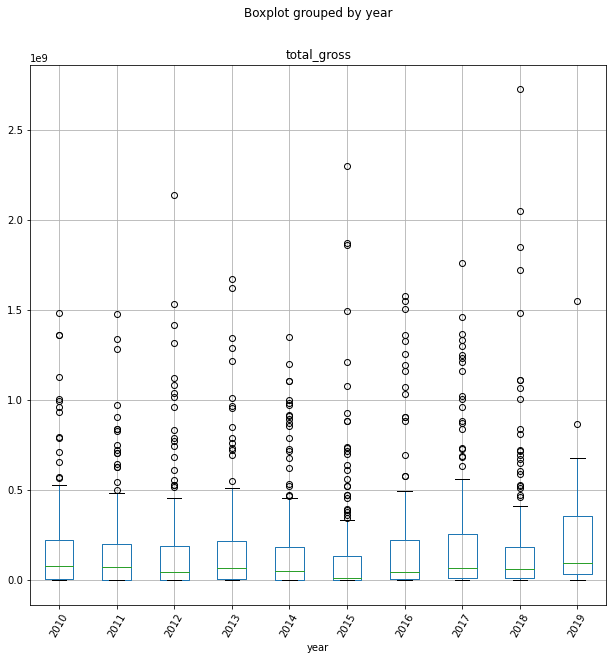

In [76]:
# total_gross by year
plt.figure(figsize=(10, 10))
final_gross_all.boxplot('total_gross', by = 'year', figsize=(10, 10))
plt.xticks(rotation = 60)

In [77]:
# # draw lineplot 
# sns.lineplot(x='year', y='year', data=final_gross_all) 
  
# # changing the theme to dark
# sns.set_style("dark")
# plt.show()

In [78]:
from revisionTesthelper_functions import *

In [79]:
df = get_clean_df()

William Friedkin
David Cronenberg
Allison Anders
Barry Levinson
Rodney Bennett
Jay Russell
Jake Kasdan
Ray Lawrence
Taylor Hackford
Frank Marshall
nan
nan
nan
William Friedkin
Peter Baldwin
George Hickenlooper
nan
Rick Rosenthal
Carl Erik Rinsch
Jim Jarmusch
nan
nan
Martyn Burke
Keith Gordon
John Woo
Michael Polish
Roy Ward Baker
David Arquette
John Sayles
Ken Loach
nan
William Wellman
Pauly Shore
Steve Boyum
Peter Cattaneo
Edward Dmytryk
Andy Sidaris
Ivan Nagy
Terence Young
Jon Turteltaub
nan
Paolo Sorrentino
Henning Schellerup
Allen Hughes|Albert Hughes
nan
Woody Allen
Yimou Zhang
Bill Froehlich
James Wong
nan
Pat Proft
Kevin Lima
Niels Arden Oplev
Matt Bettinelli-Olpin|Tyler Gillett
Anatole Litvak
Ira Miller
Steven Spielberg
Alan Alda
Otto Preminger
Terry Jones
Patrick Lussier
Tom Hanks
James Gray
Werner Herzog
Richard Kelly
Roy Rowland
nan
Ted Tetzlaff
William Beaudine
Bruce Beresford
nan
nan
Herbert Wilcox
John Gilling
Ernst Lubitsch
Cheryl Dunye
Ben Younger
Richard Linklater
Alan

Marc Forster
Henri Xhonneux
nan
Erik Gandini
Herbert Ross
Daniel Taplitz
Stephan Rick
Lawrence Kasdan
Gordon Willis
Guy Ritchie
Jacob Aaron Estes
Xie Jin
Paul Schrader
William Wyler
Eleanor Burke|Ron Eyal
Philip Goodhew
Jen McGowan
Fedor Ozep
Wolfgang Petersen
Paul Feig
Chris Riedell|Nick Riedell
James Lapine
Irving Rapper
Tim Nackashi|David Sampliner|Eric DelaBarre
Mitsuo Yanagimachi
William Beaudine
Alberto Lattuada
Godfrey Reggio
Steve Carr
Dusan Makavejev
nan
Barnaby Thompson|Oliver Parker
Lisa Cholodenko
Li Yang
Robert Stromberg
nan
Susanna White
Tom Brady
Tim Blake Nelson
Kiyoshi Kurosawa
Steve Oedekerk
Sacha Gervasi
nan
John Badham
Burt Kennedy
Richard Lester
Amy Heckerling
Stephen Shin
Robert Rodriguez
Joe Roth
nan
nan
Curtis Hanson
Tate Taylor
Jackie Kong
Wojciech Has
Shane Black
nan
nan
Curtis Hanson
Mike Figgis
nan
Rick Hauser
Youssef Delara
Steve Carr
Jimmy Sangster
Paul Weitz
Wayne Wang|Paul Auster
Eleanor Coppola
Brian Robbins
Brian Levant
Uli Edel|Ulrich Edel
Herman Yau


In [80]:
df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,writer,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21569509.0,22885836.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75605492.0,111300835.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32746941.0,108660270.0
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32746941.0,108660270.0


In [81]:
df.columns

Index(['movie_id', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'ordering',
       'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'id_x', 'release_date', 'production_budget',
       'domestic_gross_movie_budgets', 'worldwide_gross_movie_budgets',
       'studio_x', 'domestic_gross_movie_gross', 'foreign_gross_movie_gross',
       'year_x', 'primary_name', 'id_y', 'synopsis', 'rating', 'genre',
       'director', 'writer', 'theater_date', 'dvd_date', 'currency',
       'box_office', 'runtime', 'studio_y', 'year_y', 'clean_domestic_gross',
       'clean_worldwide_gross'],
      dtype='object')

In [82]:
# df['genre_categories'] = df['genres'].str.split(',').str[0]

In [83]:
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres').reset_index(drop=True)

In [84]:
# df['genre_categories'].value_counts()

In [85]:
# results = df[['genre_categories', 'clean_domestic_gross']]
# results.head()


In [86]:
# sns.barplot(x= df['genre_categories'].head(), y= df['clean_domestic_gross'], orient= 'v')

In [87]:
# sns.scatterplot(x = 'clean_domestic_gross', y = 'start_year', data= df, hue = 'genre_categories')

In [88]:
# plt.figure(figsize=(10, 10))
# df.boxplot('clean_domestic_gross', by = 'genre_categories', figsize=(10, 10))
# plt.xticks(rotation = 60)

In [89]:
# plt.figure(figsize=(10, 10))
# df.hist('clean_domestic_gross', bins=10, figsize=(10, 10))
# plt.xticks(rotation = 60)

In [90]:
df['clean_domestic_gross'].describe()

count    4.208000e+03
mean     5.330818e+07
std      8.259545e+07
min      0.000000e+00
25%      1.594798e+06
50%      2.462269e+07
75%      6.406301e+07
max      7.000596e+08
Name: clean_domestic_gross, dtype: float64

In [91]:
# plt.figure(figsize=(10, 10))
# df.boxplot('clean_domestic_gross', by = 'genre_categories', figsize=(10, 10))
# plt.xticks(rotation = 60)

In [92]:
# import pylab
# import numpy as np
# from scipy.stats import norm
# mean = df['clean_domestic_gross'].mean()
# std = df['clean_domestic_gross'].std(ddof=1)
# x = np.linspace(-10,10,1000)
# y = norm.pdf(x, loc=mean, scale=std)    # for example
# pylab.plot(x,y)
# pylab.show()

In [93]:
normalized_df = df['Norm_clean_domestic_gross']=(df['clean_domestic_gross']-df['clean_domestic_gross'].mean())/df['clean_domestic_gross'].std()

In [94]:
# normalized_df.head()

In [95]:
# plt.hist(normalized_df, bins= 1000)
# plt.show

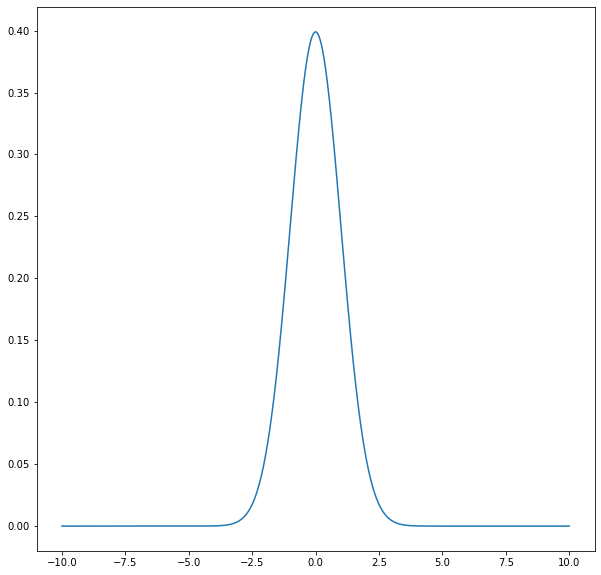

In [96]:
import pylab
import numpy as np
from scipy.stats import norm
mean = normalized_df.mean()
std = normalized_df.std(ddof=1)
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=mean, scale=std)    # for example
pylab.plot(x,y)
pylab.show()

In [97]:
# normalized_df.describe()

In [98]:
from scipy import stats

In [99]:
stats.normaltest(normalized_df)

NormaltestResult(statistic=2843.4630202243175, pvalue=0.0)

In [100]:
normalized_df

0      -0.417210
1      -0.417210
2      -0.417210
3      -0.384267
4       0.269958
          ...   
4203   -0.645413
4204   -0.645413
4205   -0.468421
4206   -0.468421
4207   -0.468421
Name: clean_domestic_gross, Length: 4208, dtype: float64

In [101]:
# stats.ttest_ind(df['clean_domestic_gross'])

In [102]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Fantasy,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21569509.0,22885836.0,-0.384267
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,Biography,14,moneyball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75605492.0,111300835.0,0.269958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,Drama,1,8days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.645413
4204,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,Thriller,1,8days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.645413
4205,tt3125324,6.9,14122,Beyond the Lights,Beyond the Lights,2014,116.0,Drama,5,beyondthelights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14618727.0,14618727.0,-0.468421
4206,tt3125324,6.9,14122,Beyond the Lights,Beyond the Lights,2014,116.0,Music,5,beyondthelights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14618727.0,14618727.0,-0.468421


In [103]:
adventures = df[df['genres']=="Adventure"]

actions = df[df['genres']=="Action"]



In [104]:
adventures

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
30,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Adventure,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
32,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Adventure,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
48,tt1524930,6.1,87582,Vacation,Vacation,2015,99.0,Adventure,7,vacation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58884188.0,102306500.0,0.067510
50,tt1524930,6.1,87582,Vacation,Vacation,2015,99.0,Adventure,7,vacation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58884188.0,102306500.0,0.067510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,tt1946502,4.5,1176,UglyDolls,UglyDolls,2019,87.0,Adventure,25,uglydolls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19894664.0,24644664.0,-0.404544
4181,tt2125435,7.3,77440,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93.0,Adventure,6,beastsofthesouthernwild,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12795746.0,23265132.0,-0.490492
4185,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,Adventure,11,theexpendables3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39322544.0,209461378.0,-0.169327
4188,tt2386490,7.6,60769,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,Adventure,20,howtotrainyourdragonthehiddenworld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160791800.0,519258283.0,1.301326


In [105]:
actions

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
12,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,Action,26,21jumpstreet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138447667.0,202812429.0,1.030801
15,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,Action,26,21jumpstreet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138447667.0,202812429.0,1.030801
29,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Action,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
31,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Action,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,Action,11,theexpendables3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39322544.0,209461378.0,-0.169327
4187,tt2386490,7.6,60769,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,Action,20,howtotrainyourdragonthehiddenworld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160791800.0,519258283.0,1.301326
4193,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,Action,2,residentevilthefinalchapter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26844692.0,314101190.0,-0.320399
4197,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,Action,15,gamenight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69179066.0,117378084.0,0.192152


In [106]:
# alpha 0.05
# mean gross income is higher in action genre than adventure
stats.ttest_ind(actions['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

1.1963460948367089e-06

<AxesSubplot:xlabel='genres'>

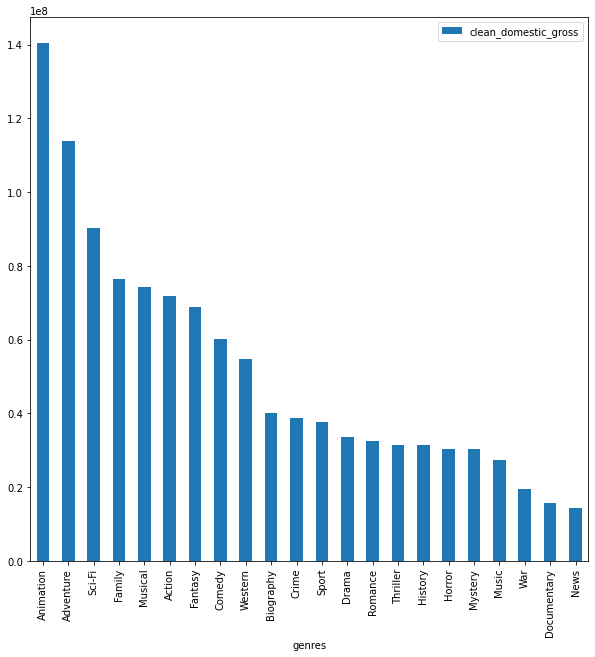

In [107]:
x = df.groupby('genres').mean()[['clean_domestic_gross']].sort_values('clean_domestic_gross', ascending = False)
x.plot.bar()

In [108]:
animations = df[df['genres']=="Animation"]

In [109]:
musicals = df[df['genres']=="Music"]

In [110]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

0.020066770926806962

In [111]:
df['production_budget'].value_counts()

20000000.0    172
5000000.0     162
10000000.0    152
30000000.0    149
25000000.0    123
             ... 
560000.0        1
30000.0         1
930000.0        1
180000.0        1
546173.0        1
Name: production_budget, Length: 252, dtype: int64

In [112]:
df['clean_domestic_gross'].value_counts()

0.0            549
132422809.0     29
248757044.0     12
21416355.0      12
67505.0         11
              ... 
209028679.0      1
56451232.0       1
20733485.0       1
152449.0         1
44983704.0       1
Name: clean_domestic_gross, Length: 1259, dtype: int64

In [113]:
df['profit'] = df['clean_domestic_gross'] - df['production_budget']

In [114]:
df['profit'].head()

0   -51151462.0
1   -51151462.0
2   -51151462.0
3    13069509.0
4    25605492.0
Name: profit, dtype: float64

<AxesSubplot:xlabel='genres'>

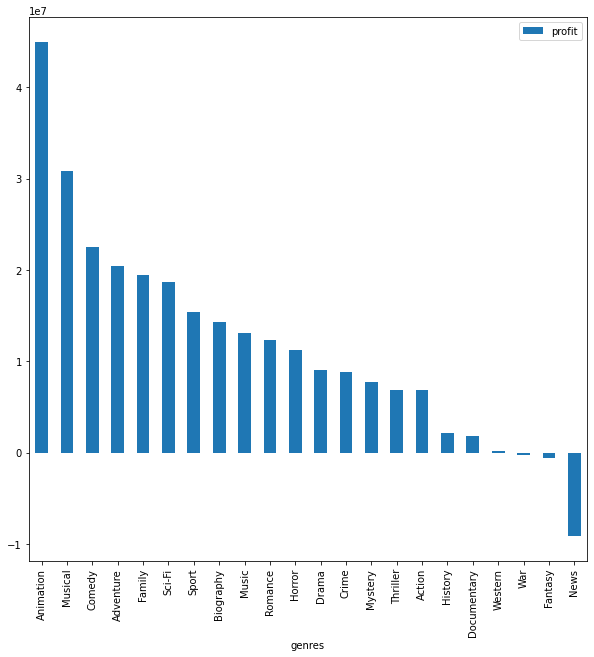

In [115]:
x = df.groupby('genres').mean()[['profit']].sort_values('profit', ascending = False)
x.plot.bar()

In [116]:
animations = df[df['genres']=="Animation"]

In [117]:
musicals = df[df['genres'] == "Music"]

In [118]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['profit'], musicals['profit']).pvalue/2

0.006882610995136657